## Simple takeaways / conclusion: 
### 1. The newer music tends to be more popular and louder in this data set. But loudness doesn't necessarily lead to popularity. 

### 2. Since the 1980s, liveness and the duration of music have tended to go down. The liveness trend makes sense since we create more music in studios.

### 3.The chart shows no apparent trend between time and valence. This is surprising since I thought the music during the dot com bubble and financial crisis would be more negative. 

## let get started

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# read data
df = pd.read_csv("data.csv")
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


## Value Description: 
### Instrumentalness: 
This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.

### Acousticness: 
This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.

### Liveness: 
This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”.

### Speechiness: 
“Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.

### Energy: 
“(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”.

### Danceability: 
“Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.

### Valence: 
“A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.

In [3]:
# get basic in of of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

### analyze data by time

<AxesSubplot:xlabel='year'>

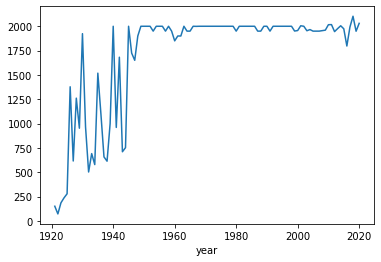

In [4]:
df_yr = df.groupby(['year']).size()
# df_yr.head()
df_yr.plot.line()

In [5]:
# get average data per year 
df2 = df.groupby("year").mean() 

# get some interesting data 
df2 = df2[["duration_ms", "valence", "loudness", "liveness", "popularity"]]
df2

,duration_ms,valence,loudness,liveness,popularity
year,,,,,
1921,260537.166667,0.379327,-17.048667,0.205710,0.653333
1922,165469.746479,0.535549,-19.275282,0.240720,0.140845
1923,177942.362162,0.625492,-14.129211,0.227462,5.389189
1924,191046.707627,0.663725,-14.231343,0.235219,0.661017
1925,184986.924460,0.621929,-14.146414,0.237668,2.604317
...,...,...,...,...,...
2016,221396.510295,0.431532,-8.061056,0.181170,59.647190
2017,211115.696787,0.416476,-8.312630,0.191713,63.263554
2018,206001.007133,0.447921,-7.168785,0.176326,63.296243


In [6]:
# normalize data since the number is in different scale
normalized_df=(df2-df2.mean())/df2.std()
normalized_df.info()
normalized_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1921 to 2020
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   duration_ms  100 non-null    float64
 1   valence      100 non-null    float64
 2   loudness     100 non-null    float64
 3   liveness     100 non-null    float64
 4   popularity   100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB


,duration_ms,valence,loudness,liveness,popularity
year,,,,,
1921,1.296931,-2.643056,-1.635625,-0.140410,-1.290754
1922,-2.412286,0.059319,-2.352590,1.815071,-1.315508
1923,-1.925646,1.615176,-0.695566,1.074566,-1.062004
1924,-1.414357,2.276539,-0.728452,1.507830,-1.290383
1925,-1.650790,1.553531,-0.701105,1.644616,-1.196518


<AxesSubplot:xlabel='year'>

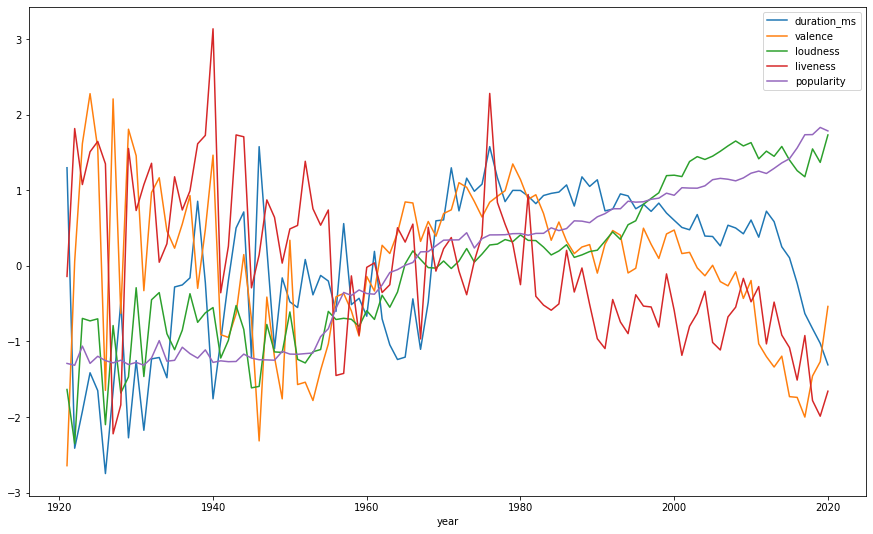

In [7]:
normalized_df.plot(figsize=(15, 9))

## simple takeaways: 
### 1. The newer music tends to be more popular and louder in this data set. But loudness doesn't necessarily lead to popularity. 

### 2. Since the 1980s, liveness and the duration of music have tended to go down. The liveness trend makes sense since we create more music in studios.

### 3.The chart shows no apparent trend between time and valence. This is surprising since I thought the music during the dot com bubble and financial crisis would be more negative. 